## Controls Interview Question
First, the interviewee will be asked if they know of any kinematic and dynamics models for cars. If they do not, that's OK, they will work with this model:

$\dot{x} = v\cos(\theta)$

$\dot{y} = v\sin(\theta)$

$\dot{v} = u_1$

$\dot{\theta} = \frac{v}{L}\tan(u_2)$


Where $(x, y)$ is the position of the car, $v$ is the speed of the car, and $\theta$ is the heading of the car. $u_1$ and $u_2$ are control inputs (namely, acceleration and steer angle). $L$ is a constant.

The "State" of the car is represented by:

In [5]:
class State:
    def __init__(self, x, y, v, theta):
        self.x = x
        self.y = y
        self.v = v
        self.theta = theta
        
    def as_vector(self):
        return np.array([
                        [self.x],
                        [self.y],
                        [self.v],
                        [self.theta]])

Control inputs (along with the duration of application of the control input) are represented as:

In [6]:
class Control:
    def __init__(self, accel, steer, dt):
        self.accel = accel
        self.steer = steer
        self.dt = dt

Write a function that takes in initial_state and control_sequence below, simulates the dynamics of the car, and returns a list of instances of State. Assume that the control input is held at a constant for the dt duration.

In [7]:
import numpy as np
import math

def generate_ramp_control_seq(dt):
    n_control = 100
    ramp_slope = 0.2
    accel = 0.1
    controls = []
    for i in range(n_control):
        steer = i * dt * ramp_slope
        controls.append(Control(accel, steer, dt))
    return controls

L = 1.53
initial_x = 0.0
initial_y = 0.0
initial_v = 1.0
initial_theta = 0.0

initial_state = State(initial_x, initial_y, initial_v, initial_theta)
control_sequence = generate_ramp_control_seq(dt = 0.01)

## Reference Answer and Results Checker

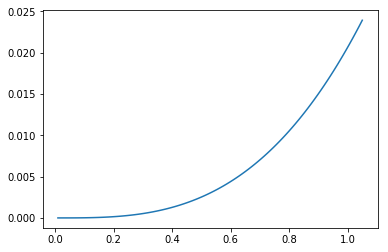

In [9]:
import matplotlib.pyplot as plt

def vector_to_state(vec):
    return State(vec[0][0], vec[1][0], vec[2][0], vec[3][0])

def plot_position(states):
    xs = [s.x for s in states]
    ys = [s.y for s in states]
    plt.plot(xs, ys)
    plt.show()

class KinematicModel:
    def __init__(self, initial_state, L):
        self.state = initial_state
        self.L = L
        
    def update_model(self, control):
        xdot = self.state.v * math.cos(self.state.theta)
        ydot = self.state.v * math.sin(self.state.theta)
        vdot = control.accel
        thetadot = (self.state.v/self.L) * math.tan(control.steer)
        state_derivs = np.array([[xdot],
                                 [ydot],
                                 [vdot],
                                 [thetadot]])
        xnew = self.state.as_vector() + control.dt * state_derivs
        self.state = vector_to_state(xnew)

model = KinematicModel(initial_state, L)

states = []
for control in control_sequence:
    model.update_model(control)
    states.append(model.state)
plot_position(states)